# 数据清洗与分析
## 收集

In [1]:
# 导入需要的库
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import matplotlib.pyplot as plt 
%matplotlib inline
import json
import re

/Library/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# 收集文件 1 保存为 dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
# 收集文件 2 保存为 dataframe
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
#r.content

In [4]:
with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

In [5]:
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
df2 = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# 收集文件 3 保存为 dataframe
df = pd.read_json('tweet_json.txt',lines=True)
df3 = df[['id','favorite_count','retweet_count']]
df3

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684


## 评估
### 目测评估

#### 质量
- 有些数据是评论，不是原始评级
- 有些数据是转发，不是原始评级
- 表格df1：评分分子中有异常值（小于10）
- 表格df1：评分分母中有异常值（不等于10）
- 表格df1：狗狗名字列有缺失值
- 表格df1：狗狗名字列有错误值（a,an,the,such等）



#### 整洁度   
- 表格df1：狗狗地位，一个变量表示成了4列（doggo、floofer、pupper、puppo）
- 表格df3：twitter id列名称为id,其他两个表格此列名称为tweet_id
- 只需一个表格，而当前有三个表格，需将三个表格合并

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df1.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Buddy         7
Bailey        7
Toby          7
an            7
Jax           6
Dave          6
Stanley       6
Koda          6
Leo           6
Rusty         6
Milo          6
Bella         6
Jack          6
Scout         6
Oscar         6
Sammy         5
           ... 
Clybe         1
Obi           1
Ziva          1
Pherb         1
Venti         1
light         1
Robin         1
Dale          1
Simba         1
Rhino         1
Boston        1
Mairi         1
Tycho         1
Chuq          1
Edd           1
Lucky         1
Bruno         1
Kulet         1
Fletcher      1
Fwed          1
Dook          1
Storkson      1
Colin         1
Maya          1
Brandy        1
Fillup        1
Smiley        1
Barclay       1
Poppy         1
Chuck         1
Name: name, Length: 957,

In [14]:
df1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
df1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
df1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
all_columns = pd.Series(list(df1)+list(df2)+list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [19]:
df1[df1.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
df2[df2.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
df3[df3.duplicated()]

,id,favorite_count,retweet_count


#### 质量
- 从‘in_reply_to_status_id’等列可以看出，有78行数据是评论，不是原始评级
- 从’retweeted_status_id‘等列可以看出，有181行数据是转发，不是原始评级
- expanded_url列有缺失值
- 表格df1：评分分子中有异常值（0、1、2、3、4、5、6、7、8、9）
- 表格df1：评分分母中有异常值（11、50、80、20等）
- 表格df1：狗狗名字列有缺失值
- 表格df1：狗狗名字列有错误值（a,an,the,such等）
- 表格df1：狗狗地位的‘doggo’、‘floofer’、‘pupper’、‘puppo’等列存在缺失值
- 表格df1有2356行数据，表格df3有2352行数据，表格df2只有2075行数据

### 目测评估+编程评估 汇总
#### 质量
##### `df1` 表格
- （三）从‘in_reply_to_status_id’等列可以看出，有78行数据是评论，不是原始评级
- （四）从’retweeted_status_id‘等列可以看出，有181行数据是转发，不是原始评级
- （五）expanded_url列有缺失值
- （八）评分分子中有异常值（0、1、2、3、4、5、6、7、8、9）
- （九）评分分母中有异常值（11、50、80、20等）
- （十）狗狗名字列有缺失值
- （十一）狗狗名字列有错误值（a,an,the,such等）


##### `df2` 表格 `df3` 表格
- （六）表格df1有2356行数据，表格df3有2352行数据，表格df2只有2075行数据


#### 整洁度   
- (七)表格df1：狗狗地位，一个变量表示成了4列（doggo、floofer、pupper、puppo）
- (一)表格df3：twitter id列名称为id,其他两个表格此列名称为tweet_id
- (二)只需一个表格，而当前有三个表格，需将三个表格合并



## 清理

In [22]:
# 备份三个数据集
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

#### 问题描述一
表格df3：twitter id列名称为id,其他两个表格此列名称为tweet_id
##### 定义
使用rename函数来修改df3表格中的’id‘列名称为’tweet_id‘

##### 代码

In [23]:
# 解决问题一的代码
df3_clean = df3_clean.rename(columns={'id':'tweet_id'})

##### 测试

In [24]:
# 测试问题一是否正确清理完成
df3_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


#### 问题描述二
只需一个表格，而当前有三个表格，需将三个表格合并
##### 定义
使用merge函数将df1,df2,df3三个表格合并，生成名为’df‘的新表格

##### 代码

In [25]:
# 解决问题二的代码
df_combined = pd.merge(df1_clean,df2_clean,how='left')
df = pd.merge(df_combined,df3_clean,how='left')

##### 测试

In [26]:
# 测试查看合并后表格前五行
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492.0,8842.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786.0,6480.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445.0,4301.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863.0,8925.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016.0,9721.0


In [27]:
# 测试查看合并后表格基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

#### 问题描述三
从‘in_reply_to_status_id’等列可以看出，有78行数据是评论，不是原始评级
##### 定义
筛选并保留’in_reply_to_status_id‘列的空值行，并删除‘in_reply_to_status_id ’‘in_reply_to_user_id ’两列
##### 代码

In [28]:
df = df[df.in_reply_to_status_id.isnull()]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
jpg_url                       2052

In [30]:
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

##### 测试

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2278 non-null int64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
jpg_url                       2052 non-null object
img_num                       2052 non-null float64
p1                           

#### 问题描述四
从’retweeted_status_id‘等列可以看出，有181行数据是转发，不是原始评级
##### 定义
筛选并保留’retweeted_status_id‘列的空值行，并删除’retweeted_status_id‘，’retweeted_status_user_id‘，’retweeted_status_timestamp‘三列
##### 代码

In [32]:
df = df[df.retweeted_status_id.isnull()]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 

In [34]:
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### 测试

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

#### 问题描述五/六
expanded_url列有缺失值
表格df1有2356行数据，表格df3有2352行数据，表格df2只有2075行数据
##### 定义
使用drop.na删除空值行
##### 代码

In [36]:
df = df.dropna(axis=0,how='any')

##### 测试

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

#### 问题描述七
表格df1：狗狗地位，一个变量表示成了4列（doggo、floofer、pupper、puppo）
##### 定义
使用str.replace函数将’doggo‘列，’floofer‘列，’pupper‘列，’puppo‘列中的’None‘值替换为空值，然后使用str.cat函数将’flooper‘,'pupper','puppo'三列的值拼接到’doggo‘列，并重命名‘doggo’列为’stage‘,删除’flooper‘,'pupper','puppo'三列
##### 代码

In [38]:
df.doggo = df.doggo.str.replace('None','')

In [39]:
df.floofer = df.floofer.str.replace('None','')

In [40]:
df.pupper = df.pupper.str.replace('None','')

In [41]:
df.puppo = df.puppo.str.replace('None','')

In [42]:
df.doggo = df.floofer.str.cat(df.doggo,sep='')

In [43]:
df.doggo = df.pupper.str.cat(df.doggo,sep='')

In [44]:
df.doggo = df.puppo.str.cat(df.doggo,sep='')

In [45]:
df.doggo = df.doggo.str.strip()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

In [47]:
df = df.rename(columns={'doggo':'stage'})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

In [49]:
df = df.drop(['floofer','pupper','puppo'],axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favorite_count        1971 non-n

In [51]:
df.stage = df.stage.replace('',np.nan)

##### 测试

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favorite_count        1971 non-nu

#### 问题描述八/九
评分分子中有异常值（0、1、2、3、4、5、6、7、8、9）   
评分分母中有异常值（11、50、80、20等）
##### 定义：尝试从text文本中重新提取评分的分子和分母，如果仍未能解决 问题，则考虑进一步查看异常数据对应的原text文本，查找正确的评分，视具体情况考虑只使用评分正确的数据做分析。
##### 代码

In [53]:
#筛选评分分子异常的数据，可以看出有412行数据评分分子异常，即小于10
df[df.rating_numerator < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,46741.0,10336.0
229,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,NaN,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,...,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,17545.0,3421.0
315,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,24478.0,3425.0
730,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,NaN,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,...,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,11586.0,3107.0
765,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,NaN,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,...,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True,7054.0,1882.0
814,771014301343748096,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7,10,None,NaN,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,...,0.202335,False,doormat,0.111790,False,macaque,0.088925,False,6998.0,1768.0
835,768193404517830656,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,...,0.396984,False,ram,0.300851,False,cheetah,0.094474,False,12104.0,4053.0
845,766423258543644672,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,NaN,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,...,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True,6651.0,1810.0
859,763183847194451968,2016-08-10 01:23:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,NaN,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,...,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False,5981.0,1690.0
883,760252756032651264,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,NaN,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,...,0.155279,False,dam,0.154515,False,crane,0.098040,False,4326.0,989.0


In [54]:
#筛选评分分母异常的数据，可以看到有17行数据评分分母异常，即不等于10
df[df.rating_denominator!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,13476.0,3699.0
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5904.0,1647.0
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,5297.0,2516.0
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,37704.0,15029.0
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,4172.0,1427.0
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4473.0,1754.0
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2562.0,246.0
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,...,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,3049.0,827.0
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,...,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2513.0,633.0
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,...,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,2623.0,716.0


In [55]:
#尝试从原text文本中提取出评分，看是否可以解决评分分子分母异常问题
texts = df.text
texts.apply(lambda x: print(x))


This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

This is Pippin. He is terrified of his new little yellow giraffe. 11/10 https://t.co/ZICNl6tIr5
When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ
This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV
Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd
This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3
10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k
Meet Snickers. He's adorable. Also comes in t-shirt mode. 12/10 I would aggressively caress Snickers https://t.co/aCRKDaFmVr
This is Ridley. He doesn't know how to couch. 7/10 https://t.co/UHJE0UgMf7
Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA
This is Cal. He's a Swedish Ge

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
31      None
        ... 
2326    None
2327    None
2328    None
2329    None
2330    None
2331    None
2332    None
2333    None
2334    None
2335    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    None
2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Name: text, Length: 1971, dtype: object

In [56]:
#提取评分的分子和分母，生成名为ratings的dataframe
ratings = df.text.str.extract(r'(\d+\.?\d*)/(\d+)',expand=True)

In [57]:
#将ratings的列名称分别修改为'rating_numerator','rating_denominator'
ratings.columns = ['rating_numerator','rating_denominator']

In [58]:
#查看ratings两列数据的数据类型，由于是从text的字符中提取，数据为字符型,需转换为整型
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      1971 non-null object
rating_denominator    1971 non-null object
dtypes: object(2)
memory usage: 46.2+ KB


In [59]:
ratings

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [60]:
#查看评分分子值分布，可以看出仍有部分值小于10，属于异常值，对比原数据并没有改善，故放弃本次提取结果，扔使用原数据进行进一步处理。
ratings.rating_numerator.value_counts()

12       446
10       417
11       392
13       253
9        150
8         95
7         52
14        33
6         32
5         32
3         19
4         16
2          9
1          5
144        1
45         1
1776       1
13.5       1
420        1
88         1
84         1
9.75       1
44         1
99         1
11.26      1
11.27      1
50         1
165        1
0          1
204        1
121        1
60         1
24         1
80         1
Name: rating_numerator, dtype: int64

In [61]:
#查看评分分母值分布，仍有分母异常值存在，且对比原数据没有改善，故放弃本次提取结果，扔使用原数据进行进一步处理
ratings.rating_denominator.value_counts()

10     1954
50        3
11        2
80        2
120       1
7         1
20        1
150       1
110       1
2         1
70        1
90        1
40        1
170       1
Name: rating_denominator, dtype: int64

In [62]:
#查看分母异常值的原text文本
df.loc[df.rating_denominator!=10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [63]:
df[df.rating_denominator!=10].text.apply(lambda x :print(x))

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
From

433     None
516     None
902     None
1068    None
1120    None
1165    None
1202    None
1228    None
1254    None
1274    None
1351    None
1433    None
1635    None
1662    None
1779    None
1843    None
2335    None
Name: text, dtype: object

##### 通过筛选并查看分母异常数据的text文本发现，分母值异常的多数情况是因为原text文本中分母值异常或缺失，此种情况下数据无法修正，但有个别行是由于评分提取错误造成的，可以通过赋值来修正：
###### 1068行正确评分是14/10
###### 1165行正确评分是13/10
###### 1202行正确评分是11/10
###### 1662行正确评分是10/10


In [64]:
df.loc[1068,['rating_numerator','rating_denominator']]=14,10

In [65]:
df.loc[1165,['rating_numerator','rating_denominator']]=13,10

In [66]:
df.loc[1202,['rating_numerator','rating_denominator']]=11,10

In [67]:
df.loc[1622,['rating_numerator','rating_denominator']]=10,10

In [68]:
df[df.rating_denominator!=10].shape

(14, 22)

In [69]:
df.loc[[1068,1165,1202,1662]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,37704.0,15029.0
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4473.0,1754.0
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2562.0,246.0
1662,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,NaN,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,...,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,39005.0,18393.0


In [70]:
#筛选出评分分母正确的数据
df = df[df.rating_denominator==10]

In [71]:
#筛选出评分分子正确的数据
df = df[df.rating_numerator>=10]

#### 测试

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2350
Data columns (total 22 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null object
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1549 non-null object
stage                 259 non-null object
jpg_url               1549 non-null object
img_num               1549 non-null float64
p1                    1549 non-null object
p1_conf               1549 non-null float64
p1_dog                1549 non-null object
p2                    1549 non-null object
p2_conf               1549 non-null float64
p2_dog                1549 non-null object
p3                    1549 non-null object
p3_conf               1549 non-null float64
p3_dog                1549 non-null object
favorite_count        1549 non-nu

In [73]:
df.rating_numerator.value_counts()

12      445
10      418
11      393
13      254
14       34
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

In [74]:
df.rating_denominator.value_counts()

10    1549
Name: rating_denominator, dtype: int64

#### 问题描述十/十一：
狗狗名字列有缺失值None
狗狗名字列有错误值（a,an,the,such等）
##### 定义
将狗狗名字列的缺失值None及错误值（a,an,the,such等）转化为Nan
##### 代码

In [75]:
df.name = df.name.replace('None',np.nan)

In [76]:
df.name = df.name.replace('a',np.nan)

In [77]:
df.name = df.name.replace('an',np.nan)

In [78]:
df.name = df.name.replace('the',np.nan)

In [79]:
df.name = df.name.replace('such',np.nan)

##### 测试

In [80]:
df.name.value_counts()

Charlie      11
Lucy         10
Oliver        9
Cooper        9
Tucker        8
Winston       7
Penny         7
Sadie         7
Daisy         6
Koda          6
Bo            6
Leo           5
Jax           5
Stanley       5
Toby          5
Louis         5
Milo          5
Lola          5
Rusty         4
Archie        4
Dave          4
Chester       4
Cassie        4
Bentley       4
Reggie        4
Sophie        4
Jack          4
Scout         4
Bear          4
Oakley        4
             ..
Mingus        1
Ziva          1
River         1
Emmy          1
Pippin        1
Sojourner     1
Huck          1
Gerald        1
Logan         1
Lennon        1
Crimson       1
Lugan         1
Emanuel       1
Puff          1
space         1
Liam          1
Klein         1
Trip          1
Oreo          1
Richie        1
Dawn          1
Anakin        1
Hall          1
Tebow         1
Zara          1
Siba          1
Schnozz       1
Ralf          1
Glenn         1
Steven        1
Name: name, Length: 787,

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2350
Data columns (total 22 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null object
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1119 non-null object
stage                 259 non-null object
jpg_url               1549 non-null object
img_num               1549 non-null float64
p1                    1549 non-null object
p1_conf               1549 non-null float64
p1_dog                1549 non-null object
p2                    1549 non-null object
p2_conf               1549 non-null float64
p2_dog                1549 non-null object
p3                    1549 non-null object
p3_conf               1549 non-null float64
p3_dog                1549 non-null object
favorite_count        1549 non-nu

### 存储清理后的主数据集

In [82]:
df.to_csv('twitter_archive_master.csv',index=False)

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


In [83]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492.0,8842.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786.0,6480.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445.0,4301.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863.0,8925.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016.0,9721.0


In [84]:
df.favorite_count = df.favorite_count.astype(int)

In [85]:
df.retweet_count = df.retweet_count.astype(int)

In [86]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492,8842
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786,6480
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445,4301
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863,8925
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016,9721


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 22 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null object
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1119 non-null object
stage                 259 non-null object
jpg_url               1549 non-null object
img_num               1549 non-null float64
p1                    1549 non-null object
p1_conf               1549 non-null float64
p1_dog                1549 non-null bool
p2                    1549 non-null object
p2_conf               1549 non-null float64
p2_dog                1549 non-null bool
p3                    1549 non-null object
p3_conf               1549 non-null float64
p3_dog                1549 non-null bool
favorite_count        1549 non-null int

#### 问题一：最人气的狗狗名字前十名是什么

In [88]:
# 分析或可视化代码
name_count = df.name.value_counts()[:10]
name_count

Charlie    11
Lucy       10
Oliver      9
Cooper      9
Tucker      8
Winston     7
Penny       7
Sadie       7
Daisy       6
Koda        6
Name: name, dtype: int64

Text(0.5,1,'popular dog names top 10')

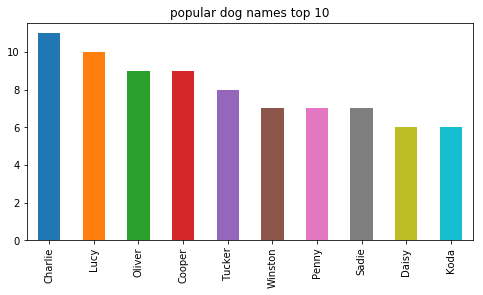

In [89]:
name_count.plot(kind='bar',figsize=(8,4))
plt.title('popular dog names top 10')

#### 结论
##### 可以看最人气的名字前十分别是Charlie,Lucy,Cooper,Oliver,Tucker,Sadie,Winston,Penny,Daisy,Bo          

#### 问题二：favorite_count与retweet_count是否相关

Text(0.5,1,'correlation between favorite count and retweet count')

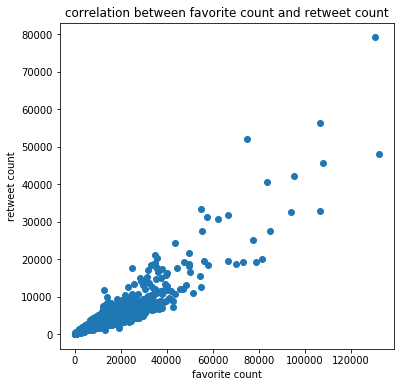

In [90]:
# 分析或可视化代码
plt.figure(figsize=(6,6))
plt.scatter([df.favorite_count],[df.retweet_count])
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.title('correlation between favorite count and retweet count')

#### 结论
##### 可以看出，随着x轴数值增大，y轴数值也跟着增大，favorite_count与retweet_count正相关

#### 问题三：在有狗狗地位的数据中，评分前三的狗狗都是什么地位？

In [91]:
df = df[['stage','rating_numerator']]
df = df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 9 to 1364
Data columns (total 2 columns):
stage               259 non-null object
rating_numerator    259 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [92]:
df.sort_values('rating_numerator',ascending=False)

,stage,rating_numerator
543,pupper,27
9,doggo,14
748,pupper,14
291,puppo,14
247,doggo,14
307,pupper,14
1130,pupper,14
312,doggo,14
325,doggo,14
326,doggo,14


#### 结论
##### 可以看出在有狗狗地位的数据中，评分最高的前三名评分分子分别为27，14，14；对应的狗狗地位分别为pupper，doggo,pupper